In [12]:
import pandas as pd
import numpy as np
import re
import pickle

In [13]:
data= pd.read_csv(r'./data/one_item_amazon_reviews.csv')
word2vec_500 = np.loadtxt('useful_embedding_matrics/word2vec_500.csv', delimiter=',')
ttest_reweight_500 = np.loadtxt('useful_embedding_matrics/ttest_reweight_500.csv', delimiter=',')
pmi_500 = np.loadtxt('useful_embedding_matrics/pmi_500.csv', delimiter=',')
glove_500 = np.loadtxt('useful_embedding_matrics/glove_500.csv', delimiter=',')


with open("useful_embedding_matrics/uniq_wrds.txt", "rb") as fp:   # Unpickling
    uniq_wrds = pickle.load(fp)

In [21]:
with open("data/reviews_token.txt", "rb") as fp:   # Unpickling
    reviews_token = pickle.load(fp)

In [10]:
data.Score.value_counts()

5    624
4    217
3     56
2     12
1      4
Name: Score, dtype: int64

In [20]:
data['if_5']=[1 if i==5 else 0 for i in data['Score']]
data.head(3)

,Unnamed: 0,Text,Summary,Score,if_5
0,0,I love these cookies! Not only are they healt...,Delicious!,5,1
1,1,Quaker Soft Baked Oatmeal Cookies with raisins...,Great Anytime of Day!,5,1
2,2,I am usually not a huge fan of oatmeal cookies...,Very good!,5,1


In [49]:
##summation of word vectorsfor each review
### 4 types of different word embeddings:

total_input=[]
for mat_input in [ttest_reweight_500,pmi_500, word2vec_500, glove_500]:
    l=[]
    for review in reviews_token:
        review_500= np.zeros(500)
        for word in review:
            review_500+=mat_input[uniq_wrds.index(word)]
        l.append(review_500)
    total_input.append(l)
input_dir={'ttest_reweight_500':total_input[0],'pmi_500':total_input[1], 'word2vec_500':total_input[2], 'glove_500':total_input[3]}

In [ ]:
# ##play-around
# from sklearn.model_selection import cross_val_score
# from sklearn.linear_model import LogisticRegression

# models = LogisticRegression(solver='liblinear', random_state=0, multi_class='auto')]
# model.fit(ttest_review_mat, data['if_5'])
# model.predict(ttest_review_mat[0:3])
# accuracies=cross_val_score(model, ttest_review_mat, data['if_5'], scoring='accuracy', cv=5)


In [63]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB

models = [RandomForestClassifier(n_estimators=200, max_depth=3, random_state=0),
#           LinearSVC(),
         # MultinomialNB(),
          LogisticRegression(solver='liblinear', random_state=0, multi_class='auto')]
CV = 5
entries = []

for input_data in input_dir:
    for model in models:
        model_name = model.__class__.__name__
        accuracies = cross_val_score(model, input_dir[input_data], data['if_5'], scoring='accuracy', cv=CV)
        for fold_idx, accuracy in enumerate(accuracies):
            entries.append((input_data, model_name, fold_idx, accuracy))
cv_df = pd.DataFrame(entries, columns=['input_mat', 'model_name', 'fold_idx', 'accuracy'])        

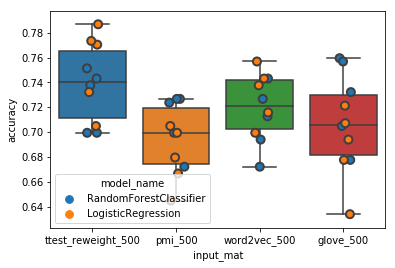

<Figure size 432x216 with 0 Axes>

In [70]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

sns.boxplot(x='input_mat', y='accuracy', data=cv_df)
sns.stripplot(x='input_mat', y='accuracy', hue= 'model_name', data=cv_df, 
              size=8, jitter=True, edgecolor="gray", linewidth=2)
plt.figure(figsize=(6,3))
plt.show()

#### T-test reweighted matrix outperforms other inputs

## RNN classification

In [72]:
import torch
from torch import nn
from torch.autograd import Variable
import torchvision.datasets as dsets
import torchvision.transforms as transforms

In [73]:
EPOCH = 1               # train the training data n times, to save time, we just train 1 epoch
BATCH_SIZE = 64
TIME_STEP = 28          # rnn time step / image height
INPUT_SIZE = 28         # rnn input size / image width
LR = 0.01               # learning rate
DOWNLOAD_MNIST = True   # set to True if haven't download the data

In [87]:
rnn_input=[]
for review in reviews_token:
    l=[]
    for word in review:
        l.append(ttest_reweight_500[uniq_wrds.index(word)])
    rnn_input.append(l)

train_x=torch.from_numpy(np.array(rnn_input))

TypeError: can't convert np.ndarray of type numpy.object_. The only supported types are: float64, float32, float16, int64, int32, int16, int8, and uint8.

In [93]:
torch.Tensor(rnn_input)

ValueError: expected sequence of length 26 at dim 1 (got 239)

In [92]:
len(rnn_input[0][0])

500

In [88]:
np.array(rnn_input)

KeyboardInterrupt: 

In [40]:
accuracies

array([0.7704918 , 0.73224044, 0.70491803, 0.78688525, 0.77348066])

In [34]:
??model.fit??

In [ ]:
??model.fit

In [32]:
LogisticRegression??

In [ ]:
df2=pd.DataFrame()


In [24]:
np.array([1,2])+np.array([1,2])

array([2, 4])

In [ ]:
pmi_500